<a href="https://colab.research.google.com/github/jiseon2/practice/blob/main/Introduction_to_Statistics_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Before Lectures**

- [Introduction to Statistics](https://www.youtube.com/watch?v=YaCQrJCgbqg)

## Import Libraries

In [2]:
import warnings
warnings.simplefilter('ignore')

import numpy as np
import pandas as pd
import scipy as sp

# pip install seaborn
import seaborn as sns   #데이터시각화에 사용
import matplotlib.pyplot as plt
from scipy import stats

## Load Dataset

In [3]:
tips = sns.load_dataset('tips')
iris = sns.load_dataset('iris')
car_crashes = sns.load_dataset('car_crashes')

## EDA (Exploratory Data Analysis)

In [ ]:
# 0~4 rows
tips.tail()

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


In [ ]:
# Description of the dataset
tips.describe()     # 범주형 자료 포함: tips.describe(include='all')

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [ ]:
# Check Data Types
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [ ]:
# Shape of the dataset
tips.shape

(244, 7)

In [ ]:
# Check NA(결측치) values
tips.isna().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

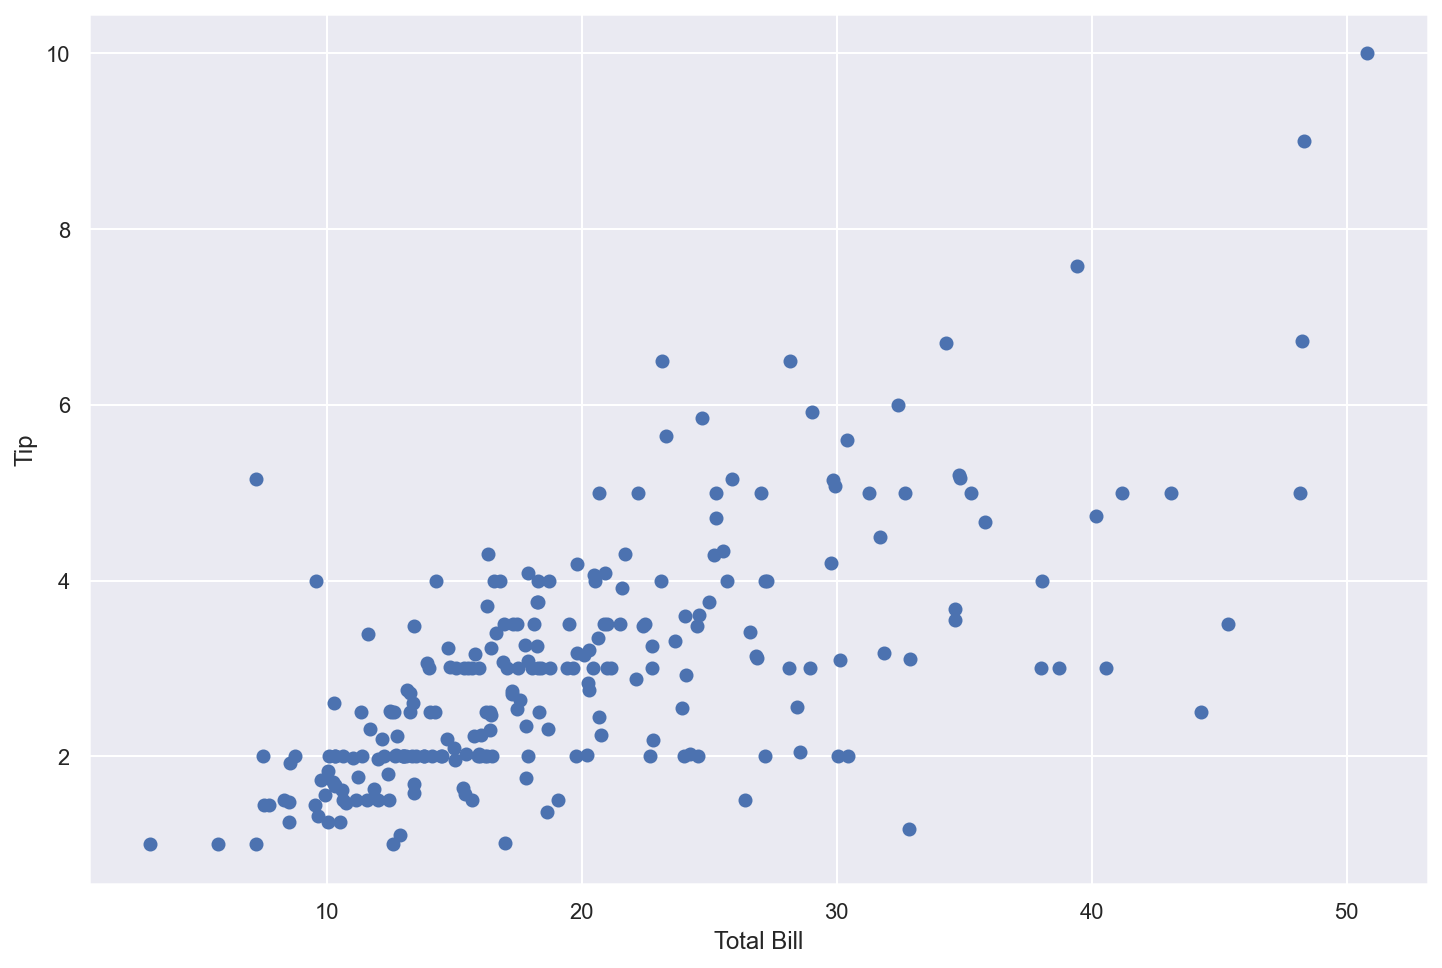

In [ ]:
plt.figure(figsize=(12,8))
plt.scatter(tips['total_bill'], tips['tip'])
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.show()

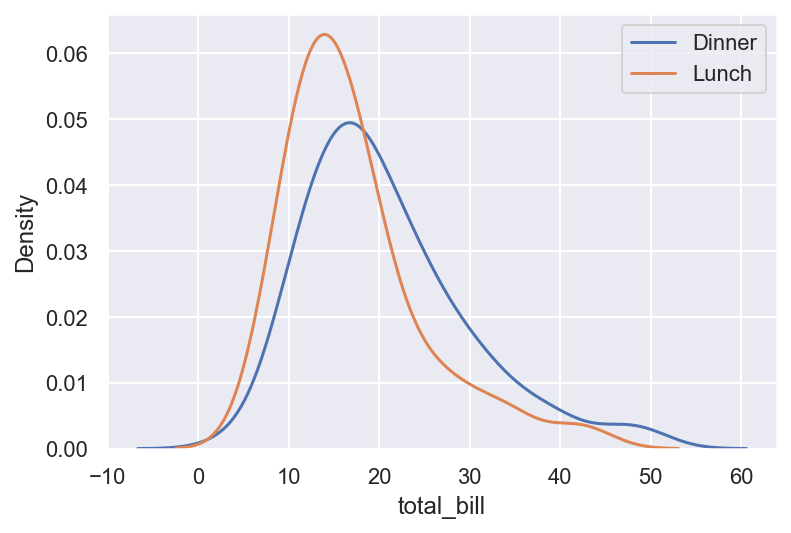

In [ ]:
# Kernel Density Estimation: 히스토그램을 스무딩해서 라인 플롯으로 만들어 줌
# Dinner & total_bill vs. Lunch & total_bill
dt = tips.loc[tips['time'] == 'Dinner']['total_bill']
lt = tips.loc[tips['time'] == 'Lunch']['total_bill']
sns.kdeplot(dt, label='Dinner')
sns.kdeplot(lt, label='Lunch')
plt.legend()
plt.show()

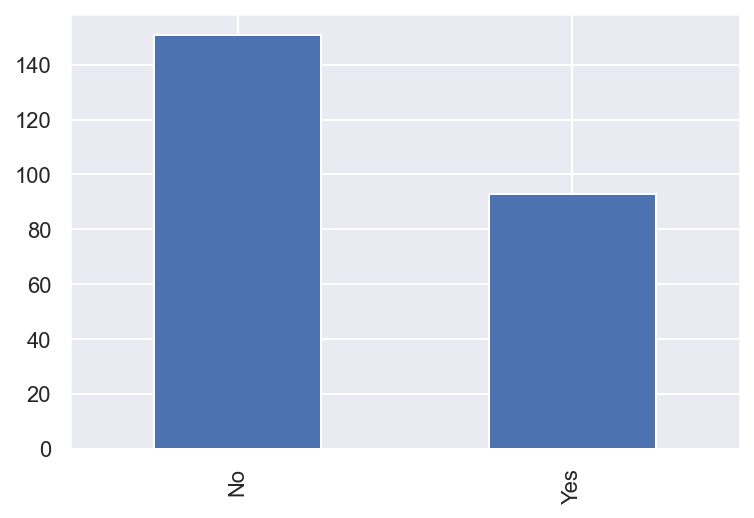

In [ ]:
tips['smoker'].value_counts().plot(kind='bar')
plt.show()

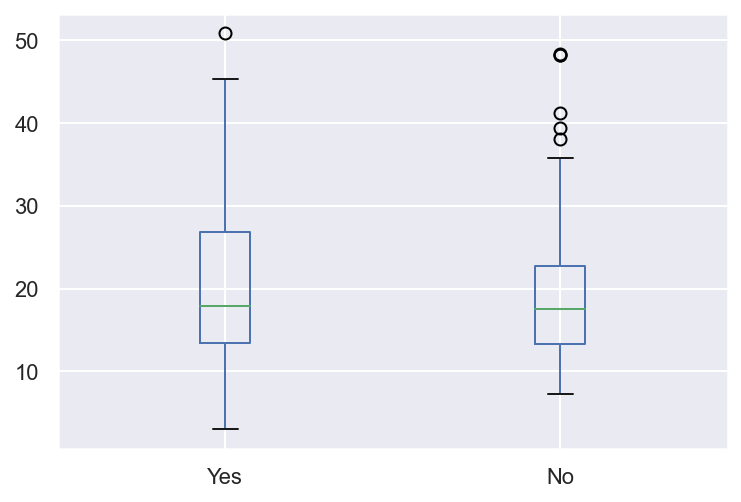

In [ ]:
pivoted_df = tips[['smoker', 'total_bill']].pivot(columns='smoker',
                                    values='total_bill')
pivoted_df.plot(kind='box')
plt.show()

## Descriptive Statistics

- Sample Mean = $\frac{1}{n}\sum_{i=1}^nX_i$

- Median : the value separating the higher half from the lower half of data

- Mode : the value that has a higher frequency in a given set of values

- IQR : the difference between the 75th and 25th percentiles of data

- Sample Variance = $\frac{\sum(X_i - \bar{X})^2}{N-1}$

- Sample Covariance = $\frac{\sum_{i=1}^N(X_i - \bar{X})(Y_i - \bar{Y})}{N-1}$

- Correlation Coefficient = $\frac{S_{XY}}{S_XS_Y}$

In [ ]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [ ]:
# Mean
print(tips['tip'].mean())
print(np.mean(tips['tip']))
print( tips['tip'].sum() / len(tips['tip']) )

2.99827868852459
2.99827868852459
2.99827868852459


In [ ]:
# Median
print(tips['tip'].median())
print(np.median(tips['tip']))

2.9
2.9


In [ ]:
# Mode, Mode(최빈값)라는 통계량은 카테고리컬 변수에 적합
tips['smoker'].mode()
tips.mode()

,total_bill,tip,sex,smoker,day,time,size
0,13.42,2.0,Male,No,Sat,Dinner,2


In [ ]:
# Variance
print(tips['tip'].var())
print(np.var(tips['tip'], ddof=1))
print(((tips['tip'] - tips['tip'].mean()) ** 2).sum() / (len(tips['tip']) -1))


# Standard Deviation
# np.sqrt(tips['tip'].var()) : 분산에 스퀘어루트
tips['tip'].std()

1.914454638062471
1.914454638062471
1.914454638062471


1.3836381890011822

In [ ]:
# IQR 산포도를 나타내는 값 중 하나, 제3분위수에서 제1분위수를 뺀 것
iqr = np.quantile(tips['tip'], 0.75) - np.quantile(tips['tip'], 0.25)
tips['tip'].quantile(0.75) - tips['tip'].quantile(0.25)

1.5624999999999996

In [7]:
# Covariance X,Y        #(Variance-)Covariance Matrix, (분산)공분산행렬
tips[['total_bill', 'tip']].cov()
print(np.cov(tips[['total_bill','tip']]).shape) #np는 기본적으로 연산을 row 단위로 함을 알 수 있음
np.cov(tips[['total_bill','tip']], rowvar=False)    #rowvar: variable이 row에 있느냐?, row가 아닌 column에 있기 때문에 false

(244, 244)


array([[79.25293861,  8.32350163],
       [ 8.32350163,  1.91445464]])

In [ ]:
# Pearson Correlation Coefficients (-1 <= r <= 1)
tips[['total_bill', 'tip']].corr()

,total_bill,tip
total_bill,1.000000,0.675734
tip,0.675734,1.000000


In [8]:
corr, p = stats.pearsonr(tips['total_bill'], tips['tip'])
print(corr)
print(p)    #p-value: 보통 유의수준 0.05(5%)를 기준으로 해서 이것보다 p-value가 작으면 두 변수의 상관계수의 값이 통계적으로 유의하다는 결론
            #귀무가설이 상관관계가 없다(비상관성)는 것을 테스트하기 위한 것이었는데, p-value가 낮으니 귀무가설을 기각해서 상관관계가 있다(없다는 것을 기각한다)는 결론

0.6757341092113647
6.69247064686336e-34


## Probability Distribution

통계 분석을 하기 위해 데이터, 변수의 확률분포를 가정하는 것이 중요

파이썬을 통해 머신러닝, 통계 모델링 등을 하게 될 텐데 그 때도 모델이 요구하는 데이터의 distribution이 있음

그런 것들이 만족되는지, 즉 이 모델이 적합하게 데이터를 fitting을 시켰는지 판단하기 위해서도 확률 분포가 가지고 있는 여러 가정들, 혹은 그 모델이 가지고 있는 확률분포로서의 가정들을 테스트하게 됨, 모델이 적합하게 fitting이 되었는지 판단하기 위해서

확률분포는 scipy라는 라이브러리 활용해서 쉽게 모델링 가능
scipy의 하위 모듈인 stats가 가지고 있는 여러가지 확률변수를 모델링하는 클래스들

|Type|Class|Prob Dist|
|------|------|------|
|Discrete|bernoulli|베르누이|
|Discrete|binom|이항|
|Continuous|uniform|균등|
|Continuous|norm|정규|
|Continuous|beta|베타|
|Continuous|t|스튜던트t|

누군가가 데이터를 수집해서 적어놓은 것으로 이해할 수도 있지만

더 확률론적으로 이해하면, sepal_length와 같은 하나의 변수가 다 확률변수가 됨

확률변수는 무조건 확률분포를 가지고 있음, 확률분포는 확률변수의 도식도

통계모델링이나 머신러닝 할 때는 변수를 하나의 확률변수로 바라보게 됨, 그 확률변수는 확률분포를 가지고 있기 때문에 그 분포적인 특성을 잘 활용하고, 해당 분포에서 샘플링을 하고, 해당 분포로부터 확률값을 계산하는 것들이 중요

이런 데이터도 누군가가 수집해서 recording했다고 이해할 수도 있지만 sepal_length라는 것은 하나의 확률분포를 전제한, 따르는 확률변수다라고 보게 되면
값들은 해당 확률분포로부터 "샘플링된 값"이라고도 볼 수 있음, 즉 이런 데이터를 확률변수가 혹은 확률분포가 생성한다고 볼 수도 있음

모델링의 관점에서는 이 변수는 어떤 확률분포를 가지고 있는 확률변수고, 이 친구(sepal_length)가 샘플링을 통해 이런 값들을 가지고 나왔다고 이해하는 것도 유용한 접근

In [4]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


### Bernoulli

$$X \sim Bernoulli(p) $$
\begin{split}
\begin{align}
f(x;p) =
\begin{cases}
p   & \text{if }x=1, \\
1-p & \text{if }x=0
\end{cases}
\end{align}
\end{split}

PMF: [0.9 0.1]


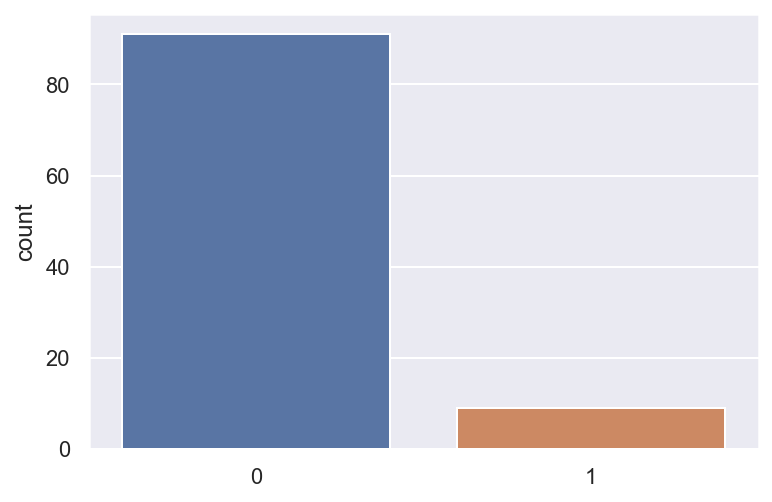

In [ ]:
p = 0.1   #베르누이분포가 가지고 있는 모수가 p, x가 1이 나올 확률이 0.1
rv = stats.bernoulli(p)   #rv=random variable

# Probability Mass Function : 확률을 반환
print("PMF:", rv.pmf([0, 1]))   #0,1은 앞면 혹은 뒷면의 의미(random variable이 가질 수 있는 값)

#iris 데이터 어떤 분포를 가정한 확률변수에서 샘플링된 값으로도 볼 수 있다고 했음!, 샘플링해보기
n_sim = 100     #simulation 횟수
samples = rv.rvs(n_sim)   #rv 클래스가 가진 rvs라는 method
sns.countplot(samples)
plt.show()

앞면과 뒷면이 아닌, 개냐 고양이냐라고 생각하면

이 이미지가 개인가 고양이인가 맞추는 모델을 가정하면, 그 모델의 출력이 가정하는 분포는 베르누이 분포가 됨

딥러닝이나 머신러닝을 사용해서 개와 고양이를 맞추는 모델의 출력이 가지는 분포를 베르누이 분포로 모델링 가능

### Binomial

이항분포는 코인을 한 번만 던지는 게 아니라 원하는 만큼 던져서
원하는 만큼 던진 것에서 앞면이 몇 번 나오느냐

$$X \sim Binomial(N,p) $$
\begin{align}
f(x;N,p) = \binom N x \; p^x(1-p)^{N-x}
\end{align}

베르누이분포를 따르는 확률변수는 0 아니면 1만 값으로 가질 수 있음

이항분포를 따르는 x라는 random variable이 가질 수 있는 값은 0부터 N까지
N이 10이라면, 코인을 열 번 던진다는 의미

10번 중에 10번 다 성공할 수도, 전부 다 실패할 수도 -> 성공 횟수가 이항분포를 따르는 확률변수가 가질 수 있는 값 so 0부터 N까지의 값을 가질 수 있음

f는 pmf, pdf
이런 discrete한 이산적인 확률변수의 경우 f가 실제 x의 확률을 의미


이항분포가 가질 수 있는 모수는 크게 두 가지, 시행횟수를 의미하는 N과 성공확률인 p(앞면이 나올 확률)

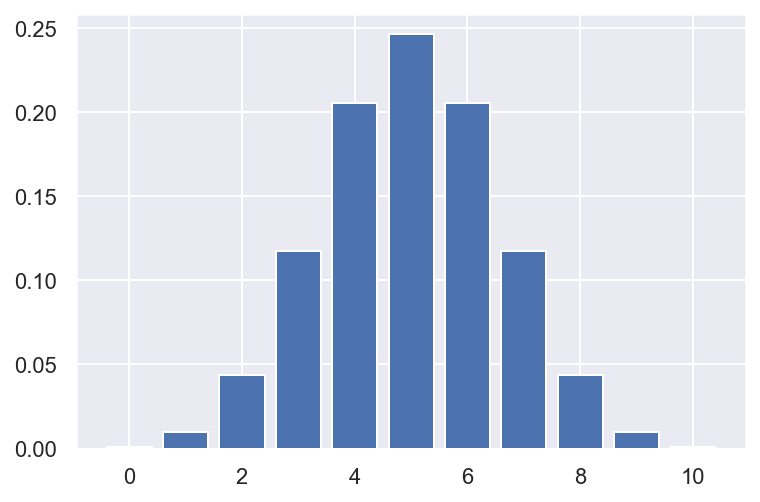

In [ ]:
N = 10
p = 0.5
rv = stats.binom(N, p)

x = np.arange(0, N+1)
rv.pmf(x)   #x에 들어갈 각각의 확률값 계산됨 -> sum하면 1 나옴
plt.bar(x, rv.pmf(x))
plt.show()

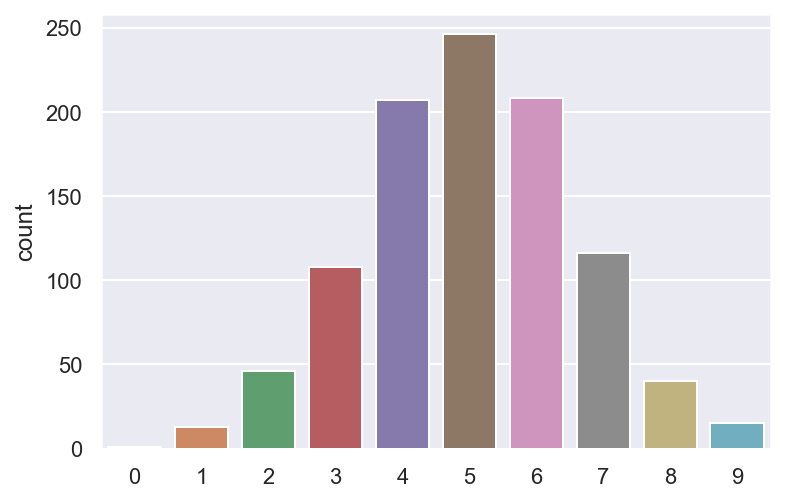

In [ ]:
#위는 식에 따른 이론적인 계산
#확률변수에서 실제로 샘플링해서 데이터를 생성해 보자

n_sim = 1000
samples = rv.rvs(n_sim)
sns.countplot(samples)
plt.show()

위에서는 scipy의 서브패키지에 있는 stats라는 패키지에서 베르누이 혹은 바이놈, 확률변수 클래스를 생성하고, 거기서 rvs라는 method를 통해서 샘플링을 했음

numpy에도 random이라는 서브패키지 안에 binomial이라는 함수 있음

scipy는 rv = stats.binom(N, p) 클래스 만들어 주고
여기서 rvs해서 생성했는데

numpy는 샘플링이 정말 쉬움, 대신 단점: 바로 샘플링은 할 수 있는데 여기서 pdf나 pmf 계산 불가

scipy는 rv 클래스 안에서 여러가지 method 활용해서 pmf값도 쓸 수 있고,
cdf라는 Cumulative Density Function
cmf: 누적분포함수
inverse df 등도 다 구할 수 있음

샘플링하는 것만 목표라면 numpy 쓰는 것 권장
왜냐하면, 시간 차이

%%timeit은 이 코드 아래 있는 코드를 반복적으로 실행할 때 평균적으로 시행 시간이 몇 초 정도 나오는지 테스트, 즉 코드의 실행 속도 알려줌

In [ ]:
%%timeit
_ = np.random.binomial(N, p, size=n_sim)

202 µs ± 49.3 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [ ]:
%%timeit
_ = rv.rvs(n_sim)

788 µs ± 74.7 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


### Normal (=Gaussian)

$$X \sim N(\mu,\sigma^2) $$

\begin{align}
f(x; \mu, \sigma^2) = \dfrac{1}{\sqrt{2\pi\sigma^2}} \exp \left(-\dfrac{(x-\mu)^2}{2\sigma^2}\right)
\end{align}

N은 Normal

가우시안분포가 가진 모수는 평균과 분산


여기서 f는 pdf, Probability Density Function, 얘가 나타내는 것은 확률값은 아님

누적 분포 함수라는 cdf라는 함수에서 cdf를 미분한 것

실제 확률과 비례한 값이긴 하지만, 전부 sum했을 때 1이 나오지 않고 1보다 커짐
이 친구를 확률로 쓰려면 normalize해야 함, 다 더해서 나눠줘서 확률로 바꿔줘서 0과 1 사이로 range를 잡아놓아야 함, 이 친구 자체로는 확률로 쓸 수 없음

그래도 pdf가 확률과 비례하는 값이기 때문에 많이 사용

연속형 확률변수의 경우에는, 가령 x = -3의 확률을 딱 구할 수 없음, x가 -3일 확률은 0임, 반드시 구간으로 구해야 함(-3부터 ~사이에 있을 확률)

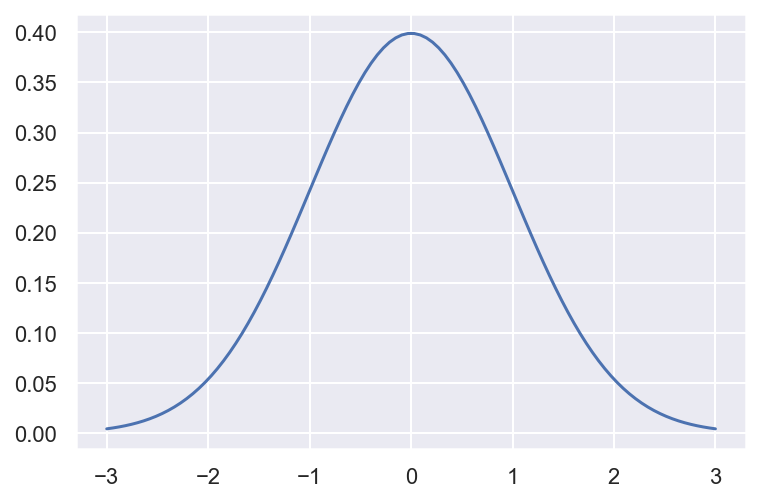

In [ ]:
mu = 0
sigma = 1
rv = stats.norm(mu, sigma)    #rv라는 class 생성

#이론적인 pdf 값 보자!

x = np.linspace(-3, 3, 100)   #정의역(x값)을 -3부터 3까지 해서 100개 정도 생성, -3에서 동일한 크기로 증가해서 3에 도달
#rv.pdf(x) -> 위의 식의 값 계산됨, -3부터 3까지 100개를 만들었는데 각각의 값들이 위의 식의 x에 들어가게 됨, 시그마와 뮤는 지정한 모수값 들어감
#rv.pdf(x).sum() -> 1보다 훨씬 커짐, pdf의 큰 특징 중 하나, 바로 확률로 쓸 수 없는 이유
plt.plot(x, rv.pdf(x))
plt.show()
#노말분포의 가장 큰 특징은 bell-shaped, 정규분포를 따르는 데이터의 분포가 종 모양처럼 가운데 우뚝 솟아 있고 가운데 기준으로 대칭인 분포

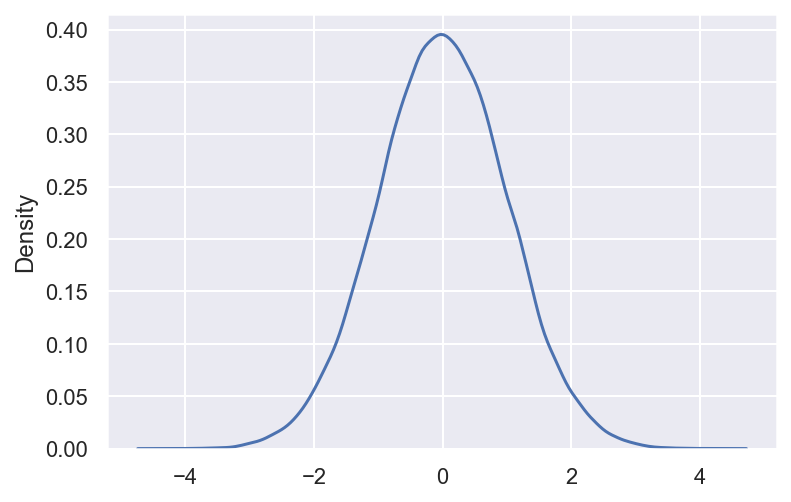

In [ ]:
n_sim = 100000
samples = rv.rvs(n_sim)
sns.kdeplot(samples)    #kde: Kernel Density Estimation
plt.show()

In [ ]:
n_sim = 100

In [ ]:
%%timeit
_ = rv.rvs(n_sim)

216 µs ± 28.3 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [ ]:
%%timeit
_ = np.random.normal(0, 1, n_sim)

35.1 µs ± 8.37 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


특정 확률 분포에서 샘플링을 하고 싶을 때, 즉 특정 분포를 따르는 데이터를 생성하고 싶을 때
scipy보다는 numpy가 가지고 있는 함수를 사용하는 것이 속도 측면에서 더 이득


----

특정 확률 분포를 따르는 확률 변수에서 데이터를 샘플링하는 것이 데이터 사이언스 같은 것을 할 때 굉장히 중요한 일, 생성할 횟수가 많아지면 속도에도 민감해지게 됨

> Box-Muller Algorithm
> 1. Generate $U_1 \sim Unif(0,1)$ and  $U_2 \sim Unif(0,1)$
> 2. $ X = \sqrt{-2log(U_1)} cos(2\pi U_2)$
> 3. $ Y = \sqrt{-2log(U_1)} sin(2\pi U_2)$

$$ X \sim N(0,1) $$
$$ Y \sim N(0,1) $$

재밌는 알고리즘! 정규 분포를 따르는 데이터를 생성할 수 있는 알고리즘

scipy 방법론이나 numpy의 normal이라는 함수를 통해서 정규분포를 따르는 데이터를 생성할 수 있지만

함수를 사용하지 못한다, 악조건에 의해서 함수를 사용할 수 없다고 한다면
위와 같이 간단하게 정규분포를 따르는 데이터를 생성할 수 있음
정규분포를 따르는 X와 Y라는 확률변수를 만들 수 있음

-------

1. 균등분포(Uniform Distribution)에서 데이터를 하나 생성
0부터 1까지로 정의된 균등분포는 np.random.random()함수를 사용하면 알아서 Unif(0,1)이라는 모수를 가진 확률분포에서 알아서 샘플링을 해줌
이 함수를 통해 나오는 값이 0과 1 사이의 랜덤한 값!

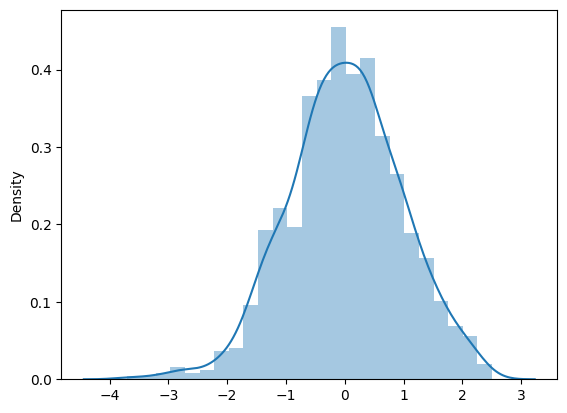

In [6]:
U1 = np.random.random(size = 1000)
U2 = np.random.random(size = 1000)     #U1과 U2라는 random variable은 서로 독립
X = np.sqrt(-2 * np.log(U1)) * np.cos(2* np.pi * U2)
Y = np.sqrt(-2 * np.log(U1)) * np.sin(2* np.pi * U2)
sns.distplot(X)
plt.show()
#0을 중심으로 대칭인 분포 나옴, Y도 마찬가지
#알고리즘을 활용해서 특정분포를 전제한 데이터를 쉽게 생성할 수 있다!

In [ ]:
%%timeit
U1 = np.random.random(size = 100)
U2 = np.random.random(size = 100)
X = np.sqrt(-2 * np.log(U1)) * np.cos(2* np.pi * U2)

64.9 µs ± 19.6 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


### CLT (Central Limit Theorem)
중심 극한 정리

The central limit theorem (CLT) states that the distribution of sample means(표본평균의 분포) approximates(근사한다) a normal distribution as the sample size gets larger(적어도 30), regardless of the population's distribution(모집단의 분포).

In [ ]:
#tips['tip'].sample(30)    -> sample method 사용하면 원하는 샘플링 사이즈를 ()안에 적을 수 있음, tips의 tip은 244개 정도의 데이터를 가지고 있는 데이터 시리즈인데, 30을 넣으면 랜덤으로 30개를 골라줌
#tips['tip'].sample(30).mean -> 랜덤으로 30개 샘플링한 시리즈의 평균 -> 얘가 표본평균임
#이런 표본평균 값들의 확률분포를 보고싶은 것!

In [10]:
#표본평균을 계산하는 코드 짜기
def compute_sample_means(data, sample_size, n_sim=1000):
    sample_means = []
    for _ in range(n_sim):
        sample_mean = data.sample(sample_size).mean() #data는 pandas dataframe
        sample_means.append(sample_mean)    #표본평균의 분포를 보기 위해 sample_means라는 리스트에 쌓기
    return np.array(sample_means)     #numpy method를 더 쉽게 쓰기 위해 list를 array로 바꾼 상태로 반환

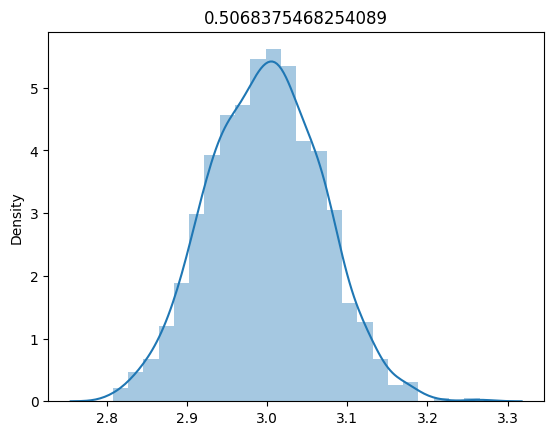

In [13]:
sample_size = 150   #sample_size 커질수록 정규분포, 대칭
sampled_sample_mean = compute_sample_means(tips['tip'], sample_size)
sns.distplot(sampled_sample_mean)   #분포가 어떻게 생겼는지 시각화, distplot은 데이터의 히스토그램과 kdeplot도 동시에 보여주는 plot
stat, p = stats.shapiro(sampled_sample_mean)
plt.title(p)
plt.show()

통계학에서 이 데이터가 정말 정규분포를 따르는지 알 수 있는 방법
지금까지는 데이터 시각화를 통해서만 확인했는데

통계적 검정 방법을 통해 이 데이터가 샘플링된(생성된) 모집단의 분포가 정규분포인지 알 수 있는 방법론이 있음

scipy의 stats에 shapiro라는 함수, 샤피로 윌크 테스트라는 데이터의 정규성을 판단하는 유명한 테스트에서 따온 함수

In [14]:
stats.shapiro(sampled_sample_mean)
#앞의 값은 검정통계량값, 뒤의 값은 p-value
#샤피로 윌크 테스트는 '이 데이터가 정규분포에서 샘플링되었다'가 귀무가설임
#귀무가설을 기각하기 위해서는 p-value값이 0.05보다 낮아야 함

ShapiroResult(statistic=0.9984253644943237, pvalue=0.5068375468254089)

## Hypothesis Testing

### Normality

- Normality Test (Shapiro-Wilk test): 정규성 검정
    - The Shapiro-Wilk test tests the null hypothesis that the
        data was drawn from a normal distribution.

데이터의 정규성을 판단하는 테스트는 샤피로 윌크 테스트말고도 몇 가지 더 있음.
KS 테스트 등, 검정 방법도 조금씩 다름, 가장 흔히 많이 쓰이는 게 샤피로 윌크 테스트

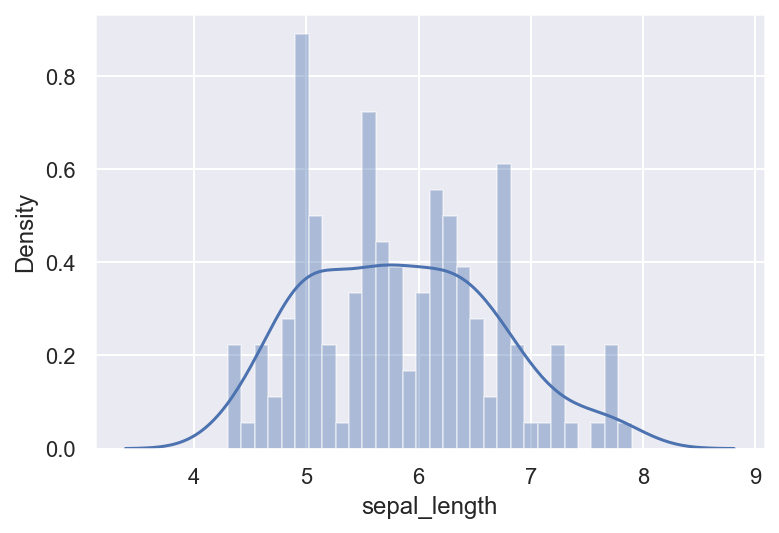

In [ ]:
sns.distplot(iris['sepal_length'], bins=30)
plt.show()

In [ ]:
stat, p = stats.shapiro(iris['sepal_length'])
print('Test Statistic:', stat)
print('p value:', p)    #p-value가 0.05보다 작은 걸 보니 정규분포를 따르는 데이터는 아닌 듯

Test Statistic: 0.9760897755622864
p value: 0.01017984002828598


In [ ]:
U1 = np.random.random(size = 10000)
U2 = np.random.random(size = 10000)
X = np.sqrt(-2 * np.log(U1)) * np.cos(2* np.pi * U2)

stat, p = stats.shapiro(X)
#stat, p = stats.shapiro(np.random.normal(0, 1, 1000)) : 그냥 무식하게 numpy의 노말 분포 생성한 데이터를 직접 넣어봐도 p-value 0.05보다 크게 나옴
print('Test Statistic:', stat)
print('p value:', p)

Test Statistic: 0.9981160759925842
p value: 0.3346971869468689


one sample t test든 two sample t test든 데이터가 정규 분포에서 나왔다는 것이 가정되어야 함

정규분포에서 가정되지 않는다면 적어도 이 데이터의 사이즈가 꽤 커야 됨

정규성 검정이 통과되는 것을 one-sample t test는 가정하고 있기 때문에 샤피로 윌크 테스트 적용해보면 정규성 검정 만족할 것

통계적 검정을 했는데 정규성 검정이 만족되지 않는다면, 적어도 실용적으로는 데이터 사이즈가 굉장히 커야 함, 정규분포 테스트도 통과를 못했는데 20이나 30처럼 작은 값으로 테스트 진행하는 것은 무리가 있음

### one sample t test
정규분포에서 나온 데이터의 모평균이 표본평균과 일치하는지를 확인하는 테스트

- one sample t test
\begin{align}
\dfrac{\bar{x} - \mu_0}{\dfrac{s}{\sqrt{N}}}
\end{align}

    - T-test for the mean of ONE group of scores.
    - A two-sided test for the null hypothesis that the expected value (mean) of a sample of independent observations `a` is equal to the given population mean
    
    (기댓값, 즉 샘플 평균이 모평균과 같다는 게 귀무가설)
    


In [ ]:
sampled_data = car_crashes['ins_losses'].sample(30)
pop_mean = car_crashes['ins_losses'].mean()   #popularity mean: 모평균    #이 교통사고 데이터가 전 세계 혹은 미국의 교통사고 데이터를 다 가지고 있고 이 보험사의 손실금액을 다 가지고 있다고 가정하고 mean을 취하면 그게 population mean이 됨

stat, p = stats.ttest_1samp(sampled_data, pop_mean)
print('Test Statistic:', stat)
print('p value:', p)

Test Statistic: 0.2201873583832361
p value: 0.8272679614343238


### two sample t test
두 샘플의 평균이 같은지 테스트하는 검정 방법

독립 표본 t 검정

- independent two sample t test
\begin{align}
t = \dfrac{\bar{x}_1 - \bar{x}_2}{s \cdot \sqrt{\dfrac{1}{N_1}+\dfrac{1}{N_2}}}
\end{align}

    - T-test for the means of *two independent* samples of scores.
    - A two-sided test for the null hypothesis that 2 independent samples have identical average (expected) values. This test assumes that the populations have identical variances


두 개의 독립적인 샘플에 대해 테스트, 독립적인 샘플이 각각 서로 동일한 기댓값(평균)을 갖는지를 테스트

정규성 가정뿐만 아니라 두 샘플의 등분산성도 기본적으로 만족해야 함,
등분산성이 위반되었을 때 따로 할 수 있는 옵션도 있지만 적어도 scipy에서 지원하는 independent two sample t test의 디폴트 옵션도 두 친구가 동일한 분산을 가지고 있다(등분산성이다)를 가정함

-------


위의 공식은 Test Statistic(검정 통계량)을 계산하는 공식

x바는 표본평균들

N은 샘플 사이즈

s는 합동분산

In [ ]:
sample_X = car_crashes.ins_losses.sample(50)
sample_Y = car_crashes.ins_losses.sample(50)
stat, p = stats.ttest_ind(sample_X, sample_Y)
print('Test Statistic:', stat)
print('p value:', p)

Test Statistic: 0.33416867757011504
p value: 0.7389663386287633


## More

- ANOVA / Regression Analysis -> 실행할 수 있는 패키지 꽤 많고 간편함
    - statsmodels, scipy, scikit-learn, ...     -> statsmodels 사용하면 ANOVA와 회귀분석 쉽게 할 수 있고, 그 모델이 선형 회귀 모델이 가정하는 여러 가정들을 만족시키는지 직관적으로 알 수 있음
- Bayesian Inference -> 통계에서 깊이 있게 실습, 공부하고 싶다면 Baysian Inference 공부해,
    - pgmpy, PyMC3   -> 이거 공부하려면 PyMC3 공부해야 함, 베이지안 추론할 때 주로 많이 사용하는 패키지, 베이지안 추론할 때 주로 'MCMC'같은 알고리즘, 깊 샘플링 이런 것들 있는데, 이런 것들을 간편하고 빠르게 실행시켜 주는 알고리즘을 내장하고 있는 패키지임 / pgmpy는 유저 프렌들리하게 조건부확률 같은 것들 쉽게 직관적으로 계산 가능, 조건부확률에서 여러 결합 확률 분포나 marginolized 확률 분포같은 것들 계산할 때 pgmpy 사용 가능
- TimeSeries Modeling   -> 시계열 모델링
    - statsmodels   -> tslearn이라는 것도 있음, 시계열 모델링하는 패키지는 많은데, 통계에 가까운 건 statsmodels에서 대부분 해결 가능
- Machine Learning   -> 깊이 있는 고급 통계 모델링으로 가려면 머신 러닝까지 가게될 것, 그러면 scikit-learn이라는 패키지를 반드시 활용하게 될 것, 그 때에도 아노바나 베이지안 인퍼런스, 시계열 모델링, 머신러닝까지 가도 여기서 다룬 코어한 지식들 그대로 유지됨
    - statsmodels, scikit-learn, ...
    
    머신러닝은 예측이나 군집화 정도의 도구이지 이런 확률론의 펀더멘털한 지식은 관여되어 있지 않다? 그렇지 않음, 확률분포나 확률변수에 대한 개념이 기본적으로 갖춰져 있어야 머신러닝 모델링할 때도 수월하고 깊이 있게 가능